# <div style="text-align: center;"><span align="center" style="color: blue">Constituent Treelib (CTL) Demo</span></div>

## Necessary imports

In [1]:
import torch
from nltk import Tree

## Handle GPU issue

In case you have a weak GPU (e.g., 2gb), it is highly recomended to use the CPU instead, in order to prevent an out-of-memory exception caused by torch that is used within benepar. To force the CPU usage, we can override the "cuda.is_available" function. However, if you have a more powerful GPU, leave the following lines commented out.

In [2]:
# import torch 
# torch.cuda.is_available = lambda : False

## Import the CTL library

In [3]:
from constituent_treelib import ConstituentTree, BracketedTree, Language, Structure

## Create the NLP pipeline

To instantiate a ConstituentTree object, a spaCy-based NLP pipeline that incorporates a benepar component is mandatory. CTL offers two possibilities to create this pipeline...
- ...dynamically by instantiating the ConstituentTree object using the parameter create_pipeline
- ...statically by creating the pipeline outside the ConstituentTree constructor via the create_pipeline() method and pass it to the constructor using the nlp parameter

Note that the first option is mainly recommended for demo purposes or if you only want to process a single sentence.
If, on the other hand, you want to process more than a single sentence and thus instantiate multiple ConstituentTree objects, it is strongly recommended to create the pipeline X outside and invoke it when instantiating the ConstituentTree object via ConstituentTree(nlp=X). 

In the following both possibilities are shown.

#### Static NLP pipelined creation

In [4]:
# Define the language for the sentence as well as for the spaCy and benepar models
language = Language.English

# Define which specific SpaCy model should be used (default is Medium)
spacy_model_size = ConstituentTree.SpacyModelSize.Medium

# Create the pipeline (note, the required models will be downloaded and installed automatically)
nlp = ConstituentTree.create_pipeline(language, spacy_model_size)

# In case you want to hide pip installation outputs...
# nlp = ConstituentTree.create_pipeline(language, spacy_model_size, quiet=True)

# If you already downloaded and installed the models, you can save validation overhead by informing CTL
# nlp = ConstituentTree.create_pipeline(language, spacy_model_size, download_models = False)

The spaCy model: 'en_core_web_md' was not found. Download is initiated...
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


[nltk_data] Downloading package benepar_en3 to
[nltk_data]     D:\install\Python39\share\nltk_data...
[nltk_data]   Unzipping models\benepar_en3.zip.


#### Dynamic NLP pipelined creation

[nltk_data] Downloading package benepar_en3 to
[nltk_data]     D:\install\Python39\share\nltk_data...
[nltk_data]   Package benepar_en3 is already up-to-date!
You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


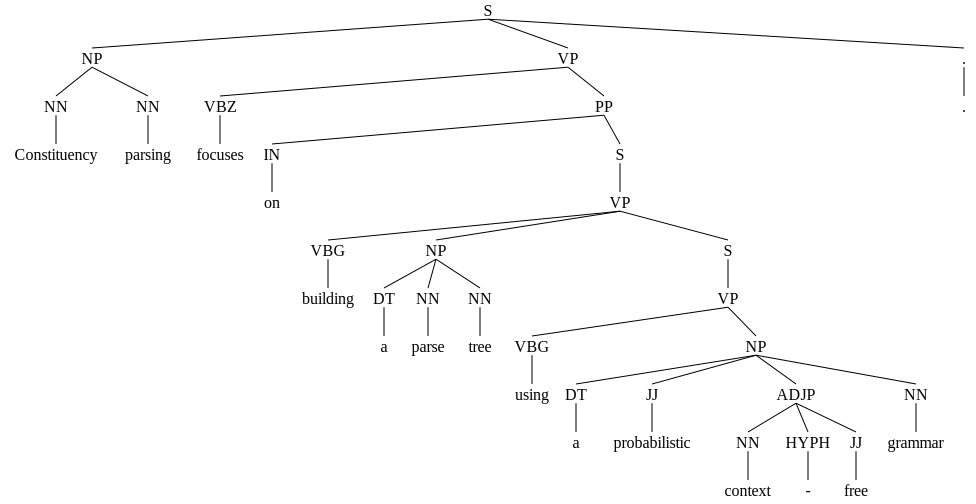

In [5]:
sentence_dyn = "Constituency parsing focuses on building a parse tree using a probabilistic context-free grammar."
tree_dyn = ConstituentTree(sentence_dyn, create_pipeline=True) 

# Now the NLP pipeline is integrated within the ConstituentTree object and is ready to use...
tree_dyn

#### Instead of creating the NLP pipeline automatically via create_pipeline(), you can also create it manually

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


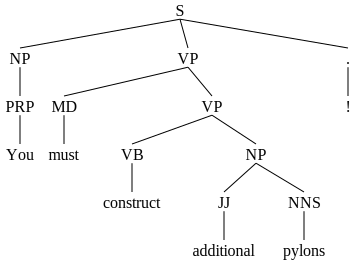

In [6]:
import spacy
import benepar

# We use English models by default..
spacy_model = "en_core_web_md"
benepar_model = "benepar_en3"  

nlp_pipeline = spacy.load(spacy_model, disable=["tok2vec", "tagger", "parser", "ner", "attribute_ruler", "lemmatizer"])
nlp_pipeline.add_pipe("sentencizer")
nlp_pipeline.add_pipe("benepar", config={"model": benepar_model})

sentence = "You must construct additional pylons!"
tree_using_own_nlp_pipeline  = ConstituentTree(sentence, nlp_pipeline) 
tree_using_own_nlp_pipeline

## Define some test sentences

#### English

In [7]:
sentences = [
    "You must construct additional pylons!",
    "I'm on my way to New York while they're flying to Tel Aviv.",
    "Isaac Asimov was an American writer and professor of biochemistry at Boston University.",
    "Kubrick's films typically involve expressions of an inner struggle, examined from different perspectives.",
    "Full Metal Jacket is a war drama film directed and produced by Stanley Kubrick.",
    "Stanley Getz was an American jazz saxophonist.",
    "The bridge was unfinished when it collapsed.",
    "The 2022 season is underway and there are a limited number of Single Game Tickets on sale now!",
    "And with no Wild Card possibilities for either team, the game is essentially a winner-take-all endeavor."
]

#### German

In [8]:
# sentences = [
#     "In einer Gaspipeline in Litauen hat es eine Explosion gegeben.",
#     "Für Fragen zu Freiwilligendiensten, nutzen sie bitte unser Forum!",
#     "Der Künstler verlegt seit 30 Jahren Stolpersteine, die er zur Erinnerung an die Opfer des Nationalsozialismus Häusern platziert."
#     "Damit erlangen schützenswürdige Kundendaten in den Geschäfts- und Serviceprozessen der Wertschöpfungskette im Bereich Automotive eine immer größere Bedeutung.",
#     "Die USA haben mit ihrem Investitionsprogramm für Klimaschutz reichlich Unmut der EU auf sich gezogen.",
#     "Ebenso empfehlenswert ist das Lesen einer Tageszeitung des Landes.", 
#     "Wie viel wird pro Jahr ungefähr weltweit benötigt?"
# ]

#### French

In [9]:
# sentences = [
#     "Nous irons plus tard au théâtre.",
#     "Pablo Ruiz Picasso était un peintre, dessinateur, sculpteur et graphiste espagnol.", 
#     "Découvrez une belle sélection d’évènements pour fêter la nouvelle année en partenariat avec Party."
# ]

#### Swedish

In [10]:
# sentences = [
#     "Vilken vacker skog!",
#     "Det var mycket åska och blixtar i går!",
#     "För den närmaste veckan finns ingen uppenbar risk för fjärrtransport."
# ]

#### Polish

In [11]:
# sentences = [
#     "W dodatku szczerze wierzy, że w tej wojnie stawką jest istnienie Rosji.",
#     "Poproszę pięć kilo ziemniaków.",
#     "Przepraszam, ale nie rozumiem."
# ]

#### Hungarian

In [12]:
# sentences = [
#     "A pizza tényleg kiváló volt!",
#     "Vannak kisebb és kiszámíthatatlan kivételek a szabály alól.",
#     "Ezt azért tesszük, hogy javítsuk és finanszírozzuk szolgáltatásainkat." 
# ]

#### Chinese 

In [13]:
# sentences = [
#     "你好吗？",
#     "很高兴见到你。",
#     "不好意思， 我没听懂。",
#     "请再说一遍。"   
# ]

#### Korean

In [14]:
# sentences = [
#     "말을 냇가에 끌고 갈 수는 있어도 억지로 물을 먹일 수는 없다",
#     "반갑습니다", 
#     "잘 지내세요?",
#     "그 집은 한국에서 지어졌어요"
# ]

## Instantiate a ConstituentTree object

#### ... from a raw sentence

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


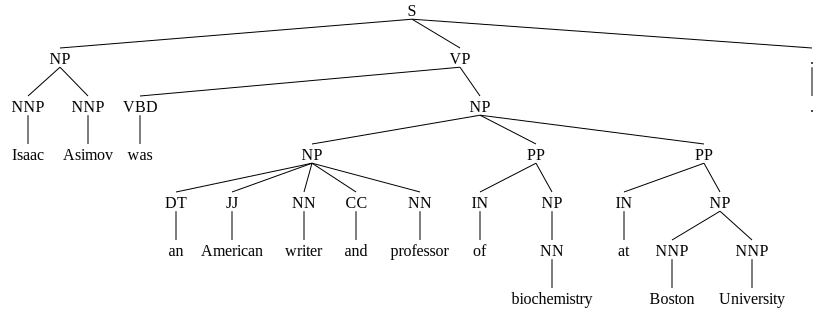

In [15]:
tree = ConstituentTree(sentence=sentences[2], nlp=nlp) #, structure=Structure.WithoutTokenLeaves) 
tree

#### ... from a bracketed tree string (wrapped as a BracketedTree object)

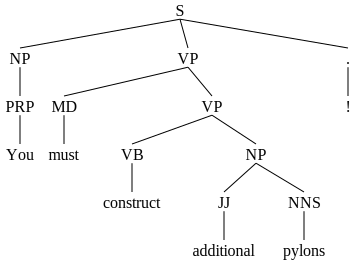

In [16]:
bracketed_tree_string = "(S (NP (PRP You)) (VP (MD must) (VP (VB construct) (NP (JJ additional) (NNS pylons)))) (. !))"
bracketed_tree = BracketedTree(bracketed_tree_string)
tree_from_bracketed = ConstituentTree(sentence=bracketed_tree, nlp=nlp)
tree_from_bracketed

#### ... from an nltk.Tree object

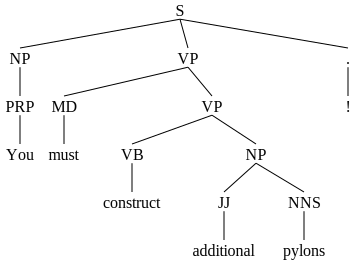

In [17]:
nltk_tree = Tree('S', [Tree('NP', [Tree('PRP', ['You'])]), Tree('VP', [Tree('MD', ['must']), Tree('VP', [Tree('VB', ['construct']), Tree('NP', [Tree('JJ', ['additional']), Tree('NNS', ['pylons'])])])]), Tree('.', ['!'])])
tree_from_nltk = ConstituentTree(sentence=nltk_tree, nlp=nlp) 
tree_from_nltk

## Expand contractions (e.g., *he's* $\rightarrow$ *he is*, *they're* $\rightarrow$ *they are*, etc.)

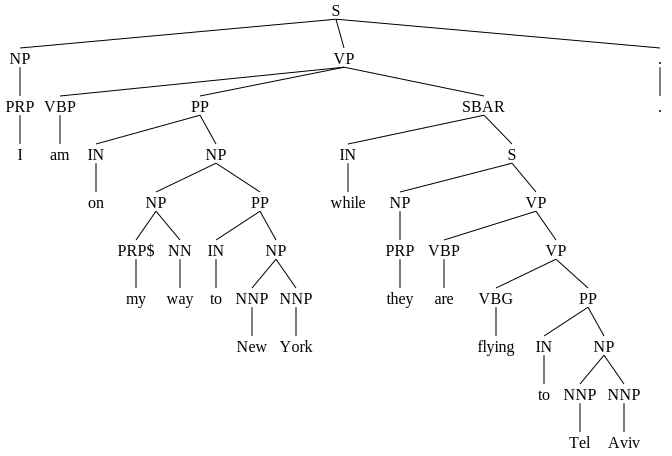

In [18]:
tree_expanded_contractions = ConstituentTree(sentence=sentences[1], nlp=nlp, expand_contractions=True)
tree_expanded_contractions

## Select desired tree structure

#### Without token leaves (tree contains now phrasal categories as inner nodes and postags as leaves)

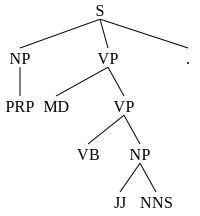

In [19]:
tree_without_token_leaves = ConstituentTree(sentences[0], nlp, Structure.WithoutTokenLeaves)
tree_without_token_leaves

#### Without postag nodes (tree contains now phrasal categories as inner nodes and tokens as leaves)

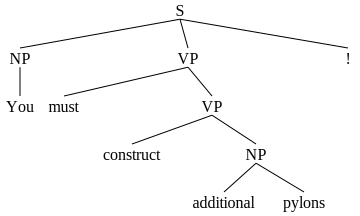

In [20]:
tree_without_postag_nodes = ConstituentTree(sentences[0], nlp, Structure.WithoutPostagNodes)
tree_without_postag_nodes

## Tree representations 

#### Plot SVG representation of the internal NLTK tree

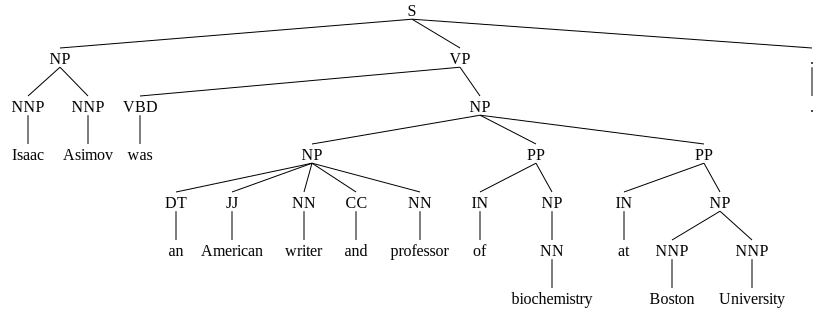

In [21]:
tree

#### Pretty-print bracketed tree string representation

In [22]:
print(tree) 

(S
  (NP (NNP Isaac) (NNP Asimov))
  (VP
    (VBD was)
    (NP
      (NP (DT an) (JJ American) (NN writer) (CC and) (NN professor))
      (PP (IN of) (NP (NN biochemistry)))
      (PP (IN at) (NP (NNP Boston) (NNP University)))))
  (. .))


#### ASCII art

In [23]:
tree.nltk_tree.pretty_print()

                                          S                                                              
        __________________________________|____________________________________________________________   
       |                    VP                                                                         | 
       |           _________|____________________                                                      |  
       |          |                              NP                                                    | 
       |          |                  ____________|________________________________                     |  
       |          |                 |                       PP                    PP                   | 
       |          |                 |                    ___|_______          ____|_____               |  
       NP         |                 NP                  |           NP       |          NP             | 
   ____|____      |    _____________|_____

#### LATEX code

In [24]:
tree.nltk_tree.pformat_latex_qtree()

'\\Tree [.S\n        [.NP [.NNP Isaac ] [.NNP Asimov ] ]\n        [.VP\n          [.VBD was ]\n          [.NP\n            [.NP\n              [.DT an ]\n              [.JJ American ]\n              [.NN writer ]\n              [.CC and ]\n              [.NN professor ] ]\n            [.PP [.IN of ] [.NP [.NN biochemistry ] ] ]\n            [.PP [.IN at ] [.NP [.NNP Boston ] [.NNP University ] ] ] ] ]\n        [.. . ] ]'

## Export visualization

CTL relies on two two open-source tools to export the generated constituent tree into the following file formats:

1.) **PDF**: For this the command line tool *wkhtmltopdf* is required: https://wkhtmltopdf.org/downloads.html <br>
Once downloaded and installed, the path to the wkhtmltopdf binary must be passed to the export function. In case of a Windows OS, an attempt is made to locate the path of the wkhtmltopdf binary by looking up the default installation directory ("Program Files/wkhtmltopdf"). 

2.) **JPG, PNG, GIF, BMP, EPS, PSD, TIFF and YAML:** For these the software suite *ImageMagick* is required: https://imagemagick.org/script/download.php <br> Here, an attempt is made to locate the path of the software suite by looking up the environment variables. Hence, an explicit path to the binary is not required.

In [25]:
tree.export_tree(destination_filepath='my_tree.pdf', verbose=True)

PDF-file successfully saved to: my_tree.pdf


## Extract content fron tree leaves

#### Text tokens

In [26]:
tree.leaves(tree.nltk_tree, ConstituentTree.NodeContent.Text)

'Isaac Asimov was an American writer and professor of biochemistry at Boston University .'

#### POS tags

In [27]:
tree.leaves(tree.nltk_tree, ConstituentTree.NodeContent.Pos) 

'NNP NNP VBD DT JJ NN CC NN IN NN IN NNP NNP .'

#### Combination of both

In [28]:
tree.leaves(tree.nltk_tree, ConstituentTree.NodeContent.Combined)

'Isaac_NNP Asimov_NNP was_VBD an_DT American_JJ writer_NN and_CC professor_NN of_IN biochemistry_NN at_IN Boston_NNP University_NNP ._.'

## Extract phrases

#### Phrasal categories 

In [29]:
tree.extract_all_phrasal_categories()

{'NP', 'PP', 'S', 'VP'}

#### All phrases (including nested)

In [30]:
all_phrases = tree.extract_all_phrases(avoid_nested_phrases=False, min_words_in_phrases=1)
for phrasal_category, phrases in all_phrases.items():
    print(phrasal_category, phrases)

NP ['Isaac Asimov', 'an American writer and professor of biochemistry at Boston University', 'an American writer and professor', 'Boston University']
VP ['was an American writer and professor of biochemistry at Boston University']
S ['Isaac Asimov was an American writer and professor of biochemistry at Boston University .']
PP ['of biochemistry', 'at Boston University']


#### All phrases (avoiding nested)

In [31]:
all_phrases = tree.extract_all_phrases(avoid_nested_phrases=True, min_words_in_phrases=1)
for phrasal_category, phrases in all_phrases.items():
    print(phrasal_category, phrases)

NP ['an American writer and professor of biochemistry at Boston University', 'Isaac Asimov']
VP ['was an American writer and professor of biochemistry at Boston University']
S ['Isaac Asimov was an American writer and professor of biochemistry at Boston University .']
PP ['at Boston University', 'of biochemistry']


#### Only noun phrases

In [32]:
phrases = tree.extract_all_phrases(avoid_nested_phrases=True)
noun_phrases = phrases['NP']

print(noun_phrases)

['an American writer and professor of biochemistry at Boston University', 'Isaac Asimov']


#### All phrases of the tree without token leaves

In [33]:
all_phrases = tree_without_token_leaves.extract_all_phrases(avoid_nested_phrases=False, min_words_in_phrases=1)
for phrasal_category, phrases in all_phrases.items():
    print(phrasal_category, phrases)

NP ['JJ NNS']
VP ['MD VB JJ NNS', 'VB JJ NNS']
S ['PRP MD VB JJ NNS .']
